Text(0, 0.5, '# of people')

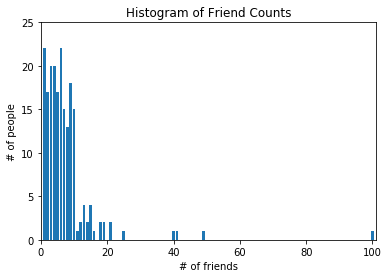

In [1]:
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

from collections import Counter
import matplotlib.pyplot as plt

friend_counts = Counter(num_friends)
xs = range(101)                         # largest value is 100
ys = [friend_counts[x] for x in xs]     # height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
# plt.show()

In [3]:
num_points = len(num_friends)

In [4]:
print(ys)

[0, 22, 17, 20, 20, 17, 22, 15, 13, 18, 15, 1, 2, 4, 2, 4, 1, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [5]:
print(xs)

range(0, 101)


In [7]:
print(friend_counts)

Counter({6: 22, 1: 22, 4: 20, 3: 20, 9: 18, 5: 17, 2: 17, 10: 15, 7: 15, 8: 13, 15: 4, 13: 4, 21: 2, 19: 2, 18: 2, 14: 2, 12: 2, 100.0: 1, 49: 1, 41: 1, 40: 1, 25: 1, 16: 1, 11: 1})


# 분류예측, 회귀, 군집화 clustering

In [8]:
#분류

In [9]:
import matplotlib.pyplot as plp
from sklearn import datasets

digits = datasets.load_digits()

In [10]:
type(digits)

sklearn.utils.Bunch

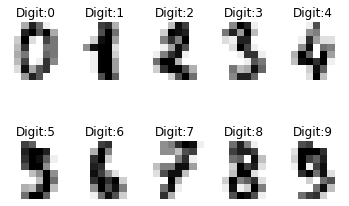

In [14]:
for label, imag in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(2, 5, label+1)
    plt.axis('off')
    plt.imshow(imag, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Digit:{0}".format(label))
plt.show()

In [16]:
import numpy as np
flag_3_8 = (digits.target==3) +(digits.target == 8)

images = digits.images[flag_3_8]
labels = digits.target[flag_3_8]

images = images.reshape(images.shape[0], -1)

In [19]:
from sklearn import tree

n_samples = len(flag_3_8[flag_3_8])
train_size = int(n_samples * 3 / 5) 
classifier = tree.DecisionTreeClassifier()  
classifier.fit(images[:train_size], labels[:train_size])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
from sklearn import metrics

expected = labels[train_size:]
predicted = classifier.predict(images[train_size:])

print('정확도:\n', metrics.accuracy_score(expected, predicted))

정확도:
 0.8601398601398601


In [23]:
print('\nConfusion matrix:\n',
     metrics.confusion_matrix(expected, predicted))

print('\n정밀도:\n',
     metrics.precision_score(expected, predicted, pos_label=3))
print('\nrecall:\n',
      metrics.recall_score(expected, predicted, pos_label=3))
print('\nF-measure:\n',
     metrics.f1_score(expected, predicted, pos_label=3))


Confusion matrix:
 [[60 15]
 [ 5 63]]

정밀도:
 0.9230769230769231

recall:
 0.8

F-measure:
 0.8571428571428571


In [24]:
from sklearn import datasets
from sklearn import cluster

In [31]:
iris = datasets.load_iris()
data = iris['data']

model = cluster.KMeans(n_clusters=3)
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

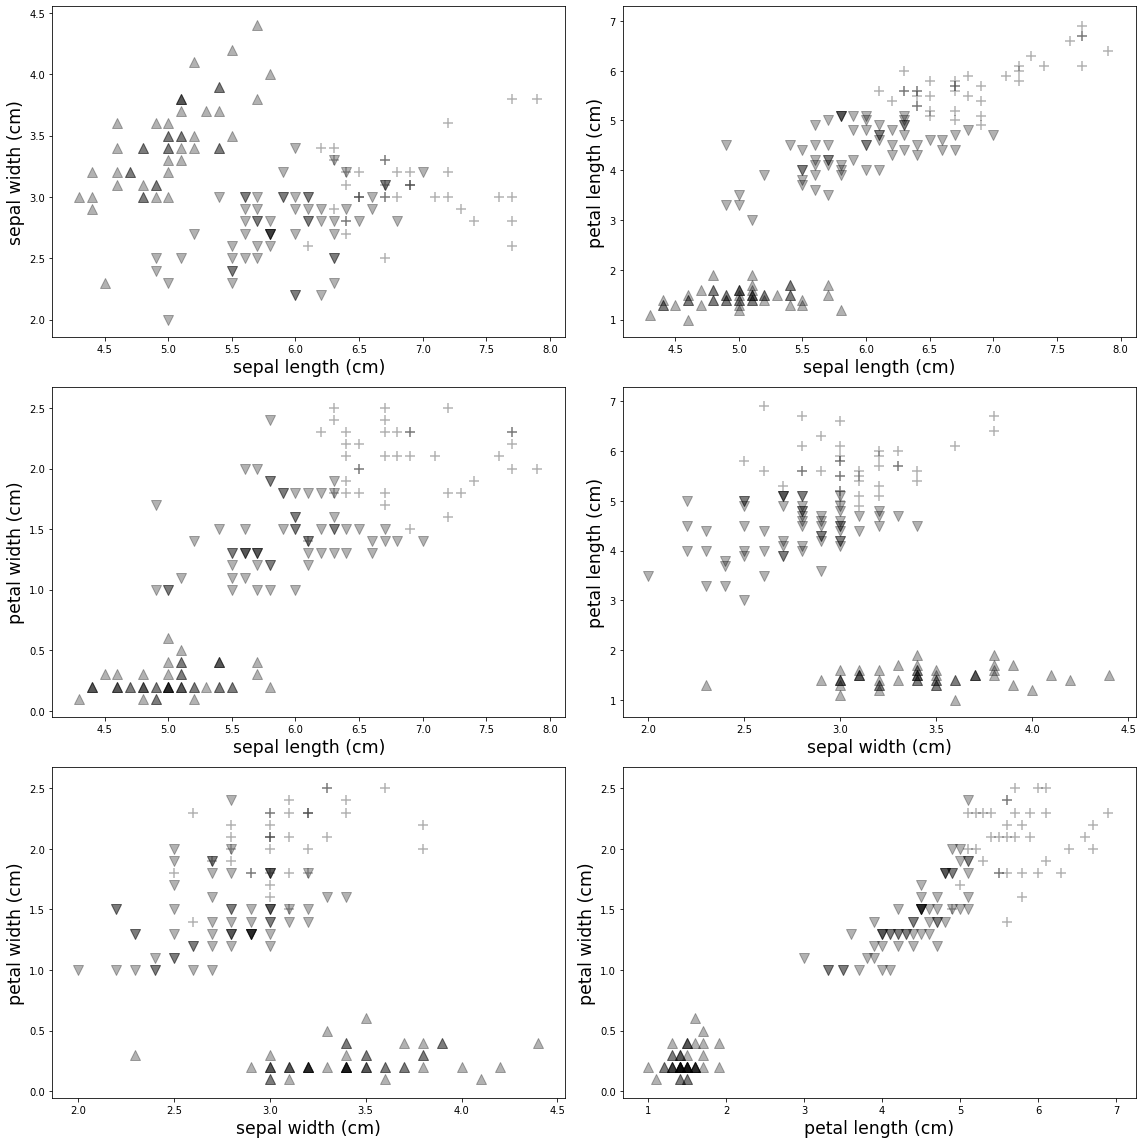

[[ 0 50  0]
 [48  0  2]
 [14  0 36]]


In [52]:
MARKERS = ["v", "^", "+", "x", "d", "p", "s", "1", "2"]

def scatter_by_features(feat_idx1, feat_idx2):
    for lbl in range(labels.max() +1):
        clustered = data[labels == lbl]
        plt.scatter(clustered[: ,feat_idx1], clustered[: ,feat_idx2],
                    c= 'black', alpha=0.3, s=100, 
                    marker=MARKERS[lbl], label='label {}'.format(lbl))

    plt.xlabel(iris['feature_names'][feat_idx1], fontsize='xx-large')
    plt.ylabel(iris['feature_names'][feat_idx2], fontsize='xx-large')
        

plt.figure(figsize=(16, 16))

# feature. sepal length, sepal width
plt.subplot(3,2,1)
scatter_by_features(0, 1)

# feature. sepal length, petal length
plt.subplot(3,2,2)
scatter_by_features(0, 2)

# feature. sepal length, petal width
plt.subplot(3,2,3)
scatter_by_features(0, 3)

# feature. sepal width, petal length
plt.subplot(3,2,4)
scatter_by_features(1, 2)

# feature. sepal width, petal width
plt.subplot(3,2,5)
scatter_by_features(1, 3)

# feature. petal length, petal length
plt.subplot(3,2,6)
scatter_by_features(2, 3)

        
# ldata = data[labels == 0]
# plt.scatter(ldata[: ,2], ldata[: ,3], c='black', alpha=0.3, s=100, marker="o")

# ldata = data[labels == 1]
# plt.scatter(ldata[: ,2], ldata[: ,3], c = 'black', alpha=0.3, s=100, marker="^")

# ldata = data[labels ==2]
# plt.scatter(ldata[: ,2], ldata[: ,3], c = 'black', alpha=0.3, s=100, marker="*")

# plt.xlabel(iris['feature_names'][2])
# plt.ylabel(iris['feature_names'][3])

plt.tight_layout()
plt.show()

print(metrics.confusion_matrix(iris['target'], model.labels_))

In [53]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')